In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict

from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Users\damni\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Game_of_Thrones_Script_Corrected.csv')

In [3]:
df.head()

,Release Date,Season,Episode,Episode Title,Sentence,Character,word_count
0,2011-04-17,Season 1,Episode 1,Winter is Coming,What do you expect? They're savages. One lot s...,waymar royce,25
1,2011-04-17,Season 1,Episode 1,Winter is Coming,I've never seen wildlings do a thing like this...,will,21
2,2011-04-17,Season 1,Episode 1,Winter is Coming,How close did you get?,waymar royce,5
3,2011-04-17,Season 1,Episode 1,Winter is Coming,Close as any man would.,will,5
4,2011-04-17,Season 1,Episode 1,Winter is Coming,We should head back to the wall.,gared,7


Here we will look at character sentiment using the Vader sentiment analysis tool.

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\damni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
analyzer = SentimentIntensityAnalyzer()

In [6]:
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [7]:
def sentiment_scores(sentence):
    return analyzer.polarity_scores(sentence)
    

In [8]:
sentiment_analyzer_scores(df['Sentence'][18353])

You're not ready. You should go home before it's too late. {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.2755}


In [9]:
# verify I can pull just a specific sentiment score
sentiment_scores(df['Sentence'][18353])['compound']

-0.2755

In [10]:
sentiment_analyzer_scores(df['Sentence'][10257])

On my honor as a Tully, on my honor as a Stark, let him go or I will cut your wife's throat! {'neg': 0.085, 'neu': 0.645, 'pos': 0.27, 'compound': 0.68}


Potential issue here as the compound score is indicative of positive or negative sentiment. With 1 being very positive and -1 being very negative. With the above example, it's being classified as fairly postive which I think is debatable.

In [11]:
df['pos'] = df['Sentence'].apply(lambda x: sentiment_scores(x)['pos'])

In [12]:
df['neg'] = df['Sentence'].apply(lambda x: sentiment_scores(x)['neg'])

In [13]:
df['neu'] = df['Sentence'].apply(lambda x: sentiment_scores(x)['neu'])

In [14]:
df['compound'] = df['Sentence'].apply(lambda x: sentiment_scores(x)['compound'])

In [15]:
df.head()

,Release Date,Season,Episode,Episode Title,Sentence,Character,word_count,pos,neg,neu,compound
0,2011-04-17,Season 1,Episode 1,Winter is Coming,What do you expect? They're savages. One lot s...,waymar royce,25,0.000,0.233,0.767,-0.7717
1,2011-04-17,Season 1,Episode 1,Winter is Coming,I've never seen wildlings do a thing like this...,will,21,0.227,0.000,0.773,0.6124
2,2011-04-17,Season 1,Episode 1,Winter is Coming,How close did you get?,waymar royce,5,0.000,0.000,1.000,0.0000
3,2011-04-17,Season 1,Episode 1,Winter is Coming,Close as any man would.,will,5,0.000,0.000,1.000,0.0000
4,2011-04-17,Season 1,Episode 1,Winter is Coming,We should head back to the wall.,gared,7,0.000,0.000,1.000,0.0000


In [16]:
#Here we'll focus only on characters that had more than 300 total lines throughout the series to better gauge their sentiment
name_filter = list((df['Character'].loc[df['Character'] != 'man'].value_counts().reset_index(name='count').query('count > 300'))['index'])

In [17]:
name_filter

['tyrion lannister',
 'jon snow',
 'daenerys targaryen',
 'cersei lannister',
 'jaime lannister',
 'sansa stark',
 'arya stark',
 'sam tarly',
 'davos',
 'petyr baelish',
 'theon greyjoy',
 'bran stark',
 'bronn',
 'varys',
 'jorah mormont',
 'tywin lannister',
 'brienne',
 'sandor clegane',
 'eddard stark',
 'robb stark']

In [18]:
sentiment_df = df[df['Character'].isin(name_filter)]
sentiment_df

,Release Date,Season,Episode,Episode Title,Sentence,Character,word_count,pos,neg,neu,compound
15,2011-04-17,Season 1,Episode 1,Winter is Coming,Go on. Father's watching.,jon snow,4,0.000,0.000,1.000,0.0000
16,2011-04-17,Season 1,Episode 1,Winter is Coming,And your mother.,jon snow,3,0.000,0.000,1.000,0.0000
18,2011-04-17,Season 1,Episode 1,Winter is Coming,Thank you.,sansa stark,2,0.714,0.000,0.286,0.3612
20,2011-04-17,Season 1,Episode 1,Winter is Coming,And which one of you was a marksman at ten? Ke...,eddard stark,15,0.000,0.000,1.000,0.0000
21,2011-04-17,Season 1,Episode 1,Winter is Coming,"Don't think too much, Bran.",jon snow,5,0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
23901,2019-05-19,Season 8,Episode 6,The Iron Throne,Uh... the Archmaester is less than enthusiasti...,sam tarly,13,0.196,0.000,0.804,0.4445
23902,2019-05-19,Season 8,Episode 6,The Iron Throne,"Well, I imagine he isn't using them properly.",bronn,8,0.259,0.000,0.741,0.2732
23903,2019-05-19,Season 8,Episode 6,The Iron Throne,I think we can all agree that ships take prece...,brienne,12,0.200,0.000,0.800,0.3612
23904,2019-05-19,Season 8,Episode 6,The Iron Throne,I think that's a very presumptuous statement.,bronn,7,0.000,0.000,1.000,0.0000


In [19]:
sentiment_df.drop('neu', axis = 1).groupby('Character').sum()

,word_count,pos,neg,compound
Character,,,,
arya stark,6445,62.491,85.158,-34.1475
bran stark,3275,35.376,41.930,-8.8040
brienne,3921,38.379,34.330,8.6103
bronn,4352,42.871,37.920,3.3993
cersei lannister,14440,114.816,104.509,12.1340
daenerys targaryen,12358,108.743,97.493,20.6493
davos,6838,68.242,40.307,27.1433
eddard stark,3326,38.243,30.038,9.8317
jaime lannister,11753,102.047,94.226,-4.7662


In [20]:
sentiment_df.drop('neu', axis = 1).groupby('Character').mean()

,word_count,pos,neg,compound
Character,,,,
arya stark,8.231162,0.079810,0.108759,-0.043611
bran stark,8.208020,0.088662,0.105088,-0.022065
brienne,10.597297,0.103727,0.092784,0.023271
bronn,11.073791,0.109087,0.096489,0.008650
cersei lannister,14.368159,0.114245,0.103989,0.012074
daenerys targaryen,11.780744,0.103663,0.092939,0.019685
davos,12.950758,0.129246,0.076339,0.051408
eddard stark,9.530086,0.109579,0.086069,0.028171
jaime lannister,12.437037,0.107986,0.099710,-0.005044


We see a few interesting things in terms of our character sentiment. Looking at our sums (which we must account for the imbalance in character lines and words) we see Tyrion totaling as the most positive character overall from his compound scores, with Sandor and Arya being the most negative.

Looking at our averages shows us a bit more. In terms of word count, it seems that when they speak, Varys has the most to say most of the time while also coming in second behind Petyr Baelish as typically having more positive dialogue. It would also seem that Sandor Clegane appears to be the most negative speaker. 

What's also interesting is that with both the sum and the mean of our compound scores, it seems that Tywin Lannister is almost a perfectly neutral character. 

In [21]:
heat = sentiment_df[['Season', 'Character', 'compound']].reset_index()
# heat.reset_index().drop('index', inplace = True, axis = 1)
heat.info()
# heat = heat.pivot('Season', 'Character', 'compound')
# ax = sns.heatmap(heat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      12814 non-null  int64  
 1   Season     12814 non-null  object 
 2   Character  12814 non-null  object 
 3   compound   12814 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.6+ KB


In [22]:
heat['Character'] = heat['Character'].astype('category')
heat['Season'] = heat['Season'].astype('category')

In [23]:
heat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      12814 non-null  int64   
 1   Season     12814 non-null  category
 2   Character  12814 non-null  category
 3   compound   12814 non-null  float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 226.5 KB


In [24]:
heat.drop('index', axis = 1, inplace=True)

In [25]:
a = list(heat['Season'].unique())
a

['Season 1',
 'Season 2',
 'Season 3',
 'Season 4',
 'Season 5',
 'Season 6',
 'Season 7',
 'Season 8']

In [26]:
set(heat['Character'])

{'arya stark',
 'bran stark',
 'brienne',
 'bronn',
 'cersei lannister',
 'daenerys targaryen',
 'davos',
 'eddard stark',
 'jaime lannister',
 'jon snow',
 'jorah mormont',
 'petyr baelish',
 'robb stark',
 'sam tarly',
 'sandor clegane',
 'sansa stark',
 'theon greyjoy',
 'tyrion lannister',
 'tywin lannister',
 'varys'}

In [27]:
heat[heat['Character'] == 'bronn'].mean()

compound    0.00865
dtype: float64

In [28]:
maps = OrderedDict()
for season in list(heat['Season'].unique()):
    new_df = heat[heat['Season'] == season]
    columns = list(new_df.Character.unique())
    char_dict ={}
    for char in columns:
        value = new_df[new_df['Character'] == char].mean()[0]
        char_dict[char] = value
    maps[season] = char_dict
#     maps[season] = values

In [29]:
maps

OrderedDict([('Season 1',
              {'jon snow': 0.0020235294117647126,
               'sansa stark': 0.016260606060606066,
               'eddard stark': 0.03327596439169139,
               'robb stark': 0.010075641025641017,
               'bran stark': -0.039195161290322585,
               'theon greyjoy': -0.05847714285714286,
               'jaime lannister': -0.019425000000000008,
               'cersei lannister': -0.00898803418803419,
               'arya stark': -0.05359117647058823,
               'tyrion lannister': 0.05438915094339622,
               'daenerys targaryen': 0.03460157480314962,
               'jorah mormont': 0.06485348837209304,
               'sandor clegane': -0.12694615384615385,
               'varys': 0.11131500000000001,
               'petyr baelish': 0.06670000000000001,
               'sam tarly': -0.05984615384615384,
               'bronn': -0.04570000000000001,
               'tywin lannister': -0.09054285714285715}),
             ('Season 2'

In [30]:
test = pd.DataFrame(maps)
test.head()

,Season 1,Season 2,Season 3,Season 4,Season 5,Season 6,Season 7,Season 8
jon snow,0.002024,-0.083663,-0.008963,-0.061036,0.072049,-0.015206,-0.024453,0.015149
sansa stark,0.016261,0.006672,0.090068,0.036705,0.014634,-0.007564,-0.061763,0.096424
eddard stark,0.033276,NaN,0.000000,NaN,NaN,-0.125664,NaN,NaN
robb stark,0.010076,0.007864,-0.071748,NaN,NaN,NaN,NaN,NaN
bran stark,-0.039195,-0.086263,-0.020758,-0.043614,-0.124275,0.024872,0.008675,0.027269


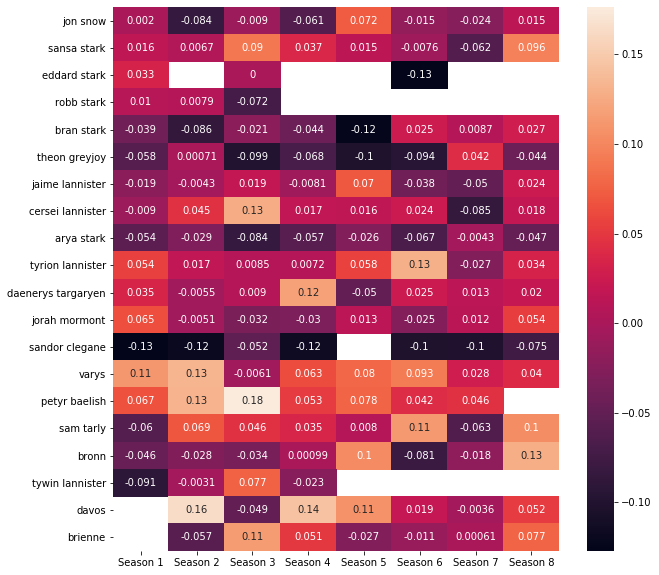

In [31]:
ax = plt.figure(figsize=[10,10])
ax = sns.heatmap(test, annot=True)
plt.savefig('sentiment_heat.png', bbox_inches = "tight")